# Auto Regressive Models 
Auto regression is a time series model that uses observations from previous time steps as inputs to a regression equation to predict the values at the next time step. For example we can predict the value for the next time step (t+1) given the observation at the last two time steps (t-1 and t-2).


#### AutoCorrelation 
 * An autoregression model makes an assumption that the observation at previous time steps are useul to predict the value at the next time step.
 * We can use statistical measures to claculate the correlation between the output variable and values at previous time at various different lags. The stronger the correlation between the output variable and a specific variable, the more weight that auto regression model can put on that variable when modelling. 
 
* The correlation statistics can also help to choose which lag variables will be useful in a model and which will not. 


In [32]:
from pandas import read_csv 
from matplotlib import pyplot 
series = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv')
series.index = series.Date
series = series.drop('Date',axis = 1)
print(series)

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
...          ...
1990-12-27  14.0
1990-12-28  13.6
1990-12-29  13.5
1990-12-30  15.7
1990-12-31  13.0

[3650 rows x 1 columns]


<AxesSubplot:>

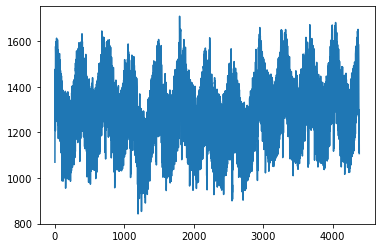

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#
# Load AutoReg class from statsmodels.tsa.ar_model module
#
from statsmodels.tsa.ar_model import AutoReg
# Load and plot the time-series data
#
url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df = pd.read_csv(url,sep=",")
df['Consumption'].plot()

P-value:  4.7440549018422596e-08


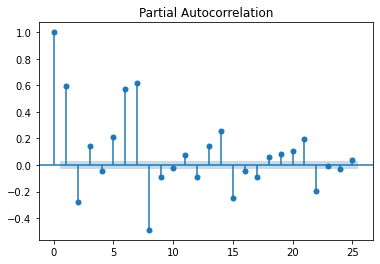

In [35]:
from statsmodels.tsa.stattools import adfuller
df_stationarityTest = adfuller(df['Consumption'], autolag='AIC')
print("P-value: ", df_stationarityTest[1])
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(df['Consumption'], lags=25)

In [37]:
train_data = df['Consumption'][:len(df)-100]
test_data = df['Consumption'][len(df)-100:]
ar_model = AutoReg(train_data, lags=8,old_names = 'False').fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:            Consumption   No. Observations:                 4283
Model:                     AutoReg(8)   Log Likelihood              -24231.812
Method:               Conditional MLE   S.D. of innovations             70.058
Date:                Sat, 30 Oct 2021   AIC                              8.503
Time:                        18:45:02   BIC                              8.518
Sample:                             8   HQIC                             8.509
                                 4283                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept        121.2792     14.444      8.397      0.000      92.969     149.589
Consumption.L1     0.6393      0.013     47.751      0.000       0.613       0.666
Consumption.L2    -0.0966      0.011

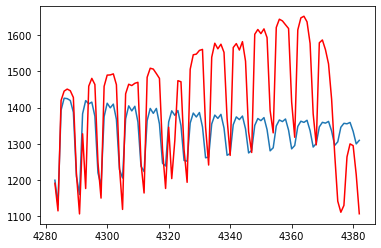

In [38]:
pred = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test_data, color='red')